In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import glob
from nltk.tokenize import RegexpTokenizer
import os

In [2]:
results = pd.read_csv("results/test_results_bigger.csv", sep=",")

In [3]:
# removing results with lemmatize True because they make absolutely no difference (at least in the limited evaluation made.
results = results[results["lemmatized"] == False]
results

,Unnamed: 0,method,type,expand,max_addition,lemmatized,avg_precision,avg_recall,avg_f1,time
0,0,1,abstract,NaN,NaN,False,0.095000,0.119604,0.104838,50.136765
1,1,1,differential,NaN,NaN,False,0.095000,0.119604,0.104838,50.136765
4,4,2,abstract,False,3.0,False,0.095000,0.119604,0.104838,50.183428
5,5,2,differential,False,3.0,False,0.085616,0.090857,0.086802,50.183428
8,8,2,abstract,True,3.0,False,0.058110,0.120679,0.077259,50.379144
9,9,2,differential,True,3.0,False,0.056426,0.101663,0.071485,50.379144
12,12,2,abstract,True,5.0,False,0.053874,0.120679,0.073309,51.450159
13,13,2,differential,True,5.0,False,0.053155,0.103544,0.069188,51.450159
16,16,2,abstract,True,7.0,False,0.053093,0.120679,0.072502,50.984283
17,17,2,differential,True,7.0,False,0.050821,0.100782,0.066484,50.984283


In [4]:
# In method 2, classifying the case with no expansion as having expansion of 0, to make it easier to evaluate together with the other results for the same method.
results.loc[results.expand == False, "max_addition"] = 0
results.loc[results.expand == False, "expand"] = True
results


,Unnamed: 0,method,type,expand,max_addition,lemmatized,avg_precision,avg_recall,avg_f1,time
0,0,1,abstract,NaN,NaN,False,0.095000,0.119604,0.104838,50.136765
1,1,1,differential,NaN,NaN,False,0.095000,0.119604,0.104838,50.136765
4,4,2,abstract,True,0.0,False,0.095000,0.119604,0.104838,50.183428
5,5,2,differential,True,0.0,False,0.085616,0.090857,0.086802,50.183428
8,8,2,abstract,True,3.0,False,0.058110,0.120679,0.077259,50.379144
9,9,2,differential,True,3.0,False,0.056426,0.101663,0.071485,50.379144
12,12,2,abstract,True,5.0,False,0.053874,0.120679,0.073309,51.450159
13,13,2,differential,True,5.0,False,0.053155,0.103544,0.069188,51.450159
16,16,2,abstract,True,7.0,False,0.053093,0.120679,0.072502,50.984283
17,17,2,differential,True,7.0,False,0.050821,0.100782,0.066484,50.984283


In [5]:
def annotate_plot(ax, x, y, values):
    for i, value in enumerate(values):
        ax.annotate(value, (x[i], y[i]))

In [6]:
_2_a_e = results[(results["method"] == 2) & (results["type"] == "abstract") & (results["expand"] == True)]
_2_a_e

,Unnamed: 0,method,type,expand,max_addition,lemmatized,avg_precision,avg_recall,avg_f1,time
4,4,2,abstract,True,0.0,False,0.095000,0.119604,0.104838,50.183428
8,8,2,abstract,True,3.0,False,0.058110,0.120679,0.077259,50.379144
12,12,2,abstract,True,5.0,False,0.053874,0.120679,0.073309,51.450159
16,16,2,abstract,True,7.0,False,0.053093,0.120679,0.072502,50.984283
20,20,2,abstract,True,10.0,False,0.052964,0.120679,0.072359,50.988612


In [7]:
_2_d_e = results[(results["method"] == 2) & (results["type"] == "differential") & (results["expand"] == True)]
_2_d_e

,Unnamed: 0,method,type,expand,max_addition,lemmatized,avg_precision,avg_recall,avg_f1,time
5,5,2,differential,True,0.0,False,0.085616,0.090857,0.086802,50.183428
9,9,2,differential,True,3.0,False,0.056426,0.101663,0.071485,50.379144
13,13,2,differential,True,5.0,False,0.053155,0.103544,0.069188,51.450159
17,17,2,differential,True,7.0,False,0.050821,0.100782,0.066484,50.984283
21,21,2,differential,True,10.0,False,0.048833,0.098167,0.064201,50.988612


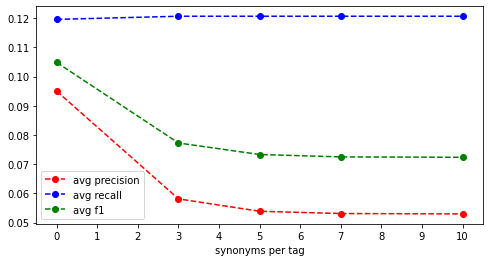

In [8]:
#fig, ax = plt.subplots()
plt.figure(figsize=(8,4))

plt.plot(_2_a_e["max_addition"], _2_a_e["avg_precision"], linestyle="--", marker="o", color="red", label="avg precision")
plt.plot(_2_a_e["max_addition"], _2_a_e["avg_recall"], linestyle="--", marker="o", color="blue", label="avg recall")
plt.plot(_2_a_e["max_addition"], _2_a_e["avg_f1"], linestyle="--", marker="o", color="green", label="avg f1")
plt.xticks([0,1,2,3,4,5,6,7,8,9,10])
plt.legend()
plt.xlabel("synonyms per tag")

#annotate_plot(ax, _2_a_e["max_addition"].tolist(), _2_a_e["avg_precision"].tolist(), _2_a_e["avg_precision"].tolist())
plt.savefig("results/method2_abstract_expand_0_3_5_7_10.png", dpi=150)

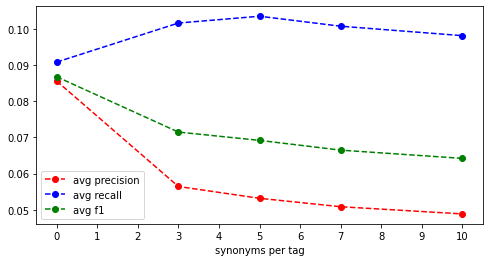

In [9]:
plt.figure(figsize=(8,4))

plt.plot(_2_d_e["max_addition"], _2_d_e["avg_precision"], linestyle="--", marker="o", color="red", label="avg precision")
plt.plot(_2_d_e["max_addition"], _2_d_e["avg_recall"], linestyle="--", marker="o", color="blue", label="avg recall")
plt.plot(_2_d_e["max_addition"], _2_d_e["avg_f1"], linestyle="--", marker="o", color="green", label="avg f1")
plt.xticks([0,1,2,3,4,5,6,7,8,9,10])
plt.legend()
plt.xlabel("synonyms per tag")

plt.savefig("results/method2_differential_expand_0_3_5_7_10.png", dpi=150)

In [10]:
_1_a = results[(results["method"] == 1) & (results["type"] == "abstract")]
_1_a

,Unnamed: 0,method,type,expand,max_addition,lemmatized,avg_precision,avg_recall,avg_f1,time
0,0,1,abstract,NaN,NaN,False,0.095,0.119604,0.104838,50.136765


In [11]:
_1_e = results[(results["method"] == 1) & (results["type"] == "differential")]
_1_e

,Unnamed: 0,method,type,expand,max_addition,lemmatized,avg_precision,avg_recall,avg_f1,time
1,1,1,differential,NaN,NaN,False,0.095,0.119604,0.104838,50.136765


In [12]:
document_keys = []

for file in glob.glob("fao/docs/*"):
    #print(file)
    filename = os.path.basename(file)
    #print(filename)
    
    doc_file = open(file, "r")
    keys_file = open(os.path.join("fao/keys", filename.split(".")[0] + ".key"), "r")
    
    doc = doc_file.read()
    doc = " ".join(RegexpTokenizer(r'[a-zA-Z]{2,}').tokenize(doc)).lower()
    
    
    keys = keys_file.read()
    keys = ",".join(keys.split("\n"))
    #print(keys)
    
    #print(doc[:10])
    #print(keys[:10])
    document_keys.append([doc, keys])

In [13]:
total_tags = 0
total_words = 0

for dk in document_keys:
    total_tags += len(dk[1].split(","))
    total_words += len(dk[0].split(" "))

print("Total words", total_words)
print("Total tags", total_tags)
print("Average words per document", total_words/len(document_keys))
print("Average tags per document", total_tags/len(document_keys))

Total words 129142
Total tags 997
Average words per document 4304.733333333334
Average tags per document 33.233333333333334
